# Importing US Tariff Categories and Number of Days each Tariff Category was imposed on goods imported from CHINA 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
x1= pd.read_csv("Tariff Categories.csv")
x2= pd.read_csv("US Tariffs on CHINA.csv")
x1.dropna(inplace=True)

#Tariff Categories imposed by US on import goods from CHINA in 2025
x1

,IEEPA 10% (Feb-Mar 2025),IEEPA 20% (Mar-Apr 2025),IEEPA 10% Baseline (Apr-May 2025),Reciprocal 34% (Apr 2025),Reciprocal 84% (Apr 2025),Reciprocal 125% (Apr 2025),Reciprocal 10% Baseline (May 2025)
0,0.1,0.2,0.1,0.34,0.84,1.25,0.1


In [3]:
#Number of Days each Tariff Category was active on imported goods from CHINA in 2025
x2.set_index('Month', inplace=True)
x2

,IEEPA 10% (Feb-Mar 2025),IEEPA 20% (Mar-Apr 2025),IEEPA 10% Baseline (Apr-May 2025),Reciprocal 34% (Apr 2025),Reciprocal 84% (Apr 2025),Reciprocal 125% (Apr 2025),Reciprocal 10% Baseline (May 2025)
Month,,,,,,,
25-Jan,31,0,0,0,0,0,0
25-Feb,25,3,0,0,0,0,0
25-Mar,0,31,0,0,0,0,0
25-Apr,0,0,5,5,1,20,0
25-May,0,0,14,0,0,0,18


In [4]:
type(x1)

pandas.core.frame.DataFrame

In [5]:
#converting the dataframes to Array for Matrix Multiplication
import numpy as np
x1=x1.to_numpy()

In [6]:
type(x1)

numpy.ndarray

In [7]:
x2=x2.to_numpy()

# Calculating Weighted Average Tariff to Quantify a single Monthly Tariff against various Tariff categories

In [8]:
#Calculating the Numerator for Weighted Average tariff for first 5 months of 2025
tariff_n= np.dot(x2, x1.T) #Dim x2(5,7) multiplied by Dim x1(7,1)
tariff_n #Weighted Average Tariff numerators

array([[ 3.1 ],
       [ 3.1 ],
       [ 6.2 ],
       [28.04],
       [ 3.2 ]])

In [9]:
tariff_n.shape

(5, 1)

In [10]:
#Calculating the Denominator for Monthly Weighted Average Tariff, i.e., Number of days in each Month 2025
import calendar

def days_in_month(year):
  mon=[]
  for month in range(1, 6):
    num_days = calendar.monthrange(year, month)[1]
    mon.append([num_days])
  return mon

#inputting number of total days for Jan, Feb, March, April, May 2025
tariff_d= days_in_month(2025)
tariff_d #Weighted Average Tariff denominators

[[31], [28], [31], [30], [31]]

In [11]:
#final Weighted Average Tariff for first 5 months of 2025
Tariff1= tariff_n/tariff_d
Tariff1

array([[0.1       ],
       [0.11071429],
       [0.2       ],
       [0.93466667],
       [0.10322581]])

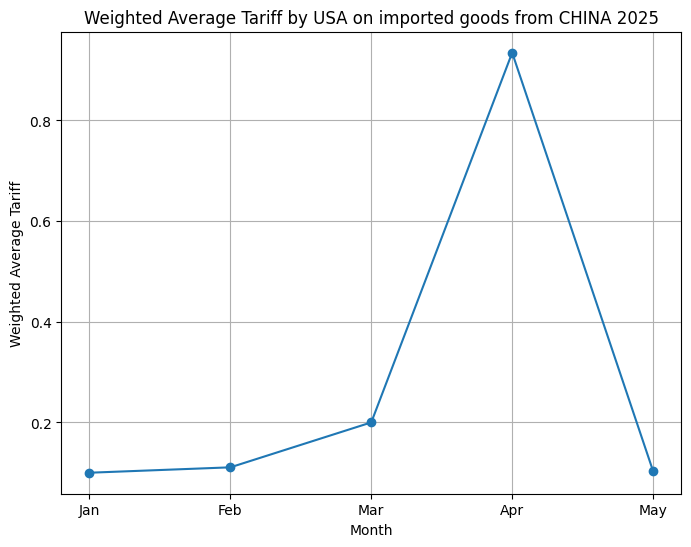

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), Tariff1, marker='o', linestyle='-')
plt.title('Weighted Average Tariff by USA on imported goods from CHINA 2025')
plt.xlabel('Month')
plt.ylabel('Weighted Average Tariff')
plt.xticks(range(1, 6), ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.grid(True)
plt.show()

In [13]:
#Test data
Tariff_May= Tariff1[-1]
Tariff_May

array([0.10322581])

In [14]:
#Train data
Tariff_JanApril= Tariff1[0:4]
Tariff_JanApril

array([[0.1       ],
       [0.11071429],
       [0.2       ],
       [0.93466667]])

# Importing the U.S. Import Price Index for goods from China 2025 Data

In [15]:
Import_Price_Index = pd.read_csv('CHNTOT.csv')
Import_Price_Index

,observation_date,CHNTOT
0,Jan-25,99.9
1,Feb-25,99.8
2,Mar-25,99.3
3,Apr-25,99.2


In [16]:
Import_Price_Index .set_index('observation_date', inplace=True)
Import_Price_Index

,CHNTOT
observation_date,
Jan-25,99.9
Feb-25,99.8
Mar-25,99.3
Apr-25,99.2


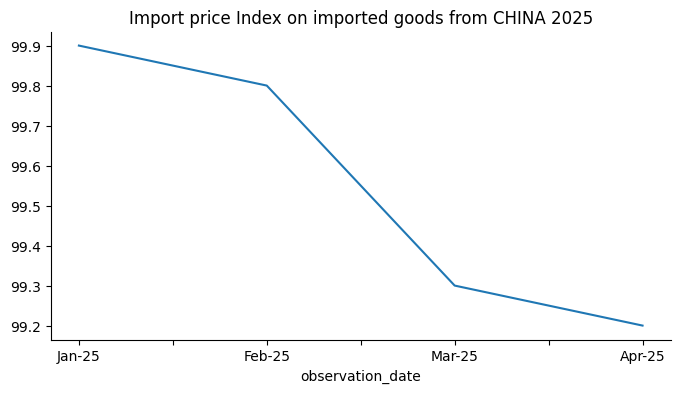

In [40]:
# CHNTOT

Import_Price_Index['CHNTOT'].plot(kind='line', figsize=(8, 4), title='Import price Index on imported goods from CHINA 2025')
plt.gca().spines[['top', 'right']].set_visible(False)

The above graph shows the Price of goods imported from CHINA in USA has decreased significantly due to the Tariffs imposed from February 2025.

# Linear Regression Model

Here is the Equation to fit Linear regression for Impact of US Tariffs on prices of imported Chinese goods

**Import_Price_Index = A + B*Tariff + E**

where Import_Price_Index is the Dependent Varibale and Tariff is Independent Variable

In [18]:
# Add a constant to the independent variable for the intercept
y = Import_Price_Index.iloc[:, 0].values.reshape(-1, 1)
X = Tariff_JanApril.reshape(-1, 1)

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     2.473
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.256
Time:                        13:33:12   Log-Likelihood:                0.69534
No. Observations:                   4   AIC:                             2.609
Df Residuals:                       2   BIC:                             1.382
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7688      0.200    498.616      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


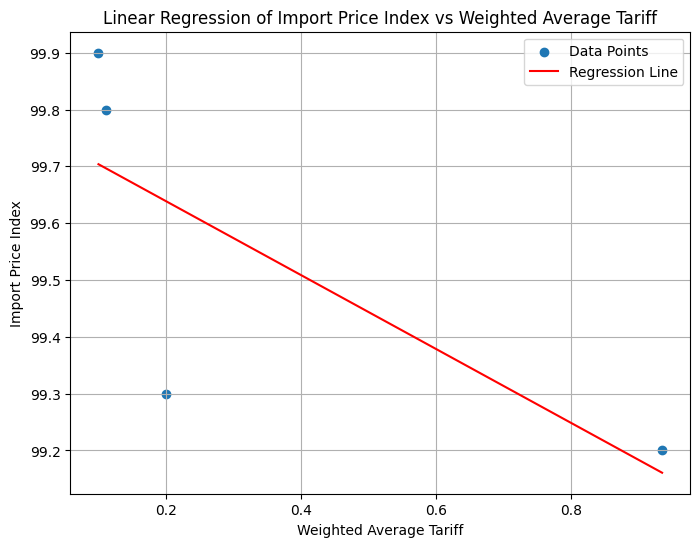

In [19]:
# Get the predicted values
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, label='Data Points')

# Plot the regression line
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')

plt.title('Linear Regression of Import Price Index vs Weighted Average Tariff')
plt.xlabel('Weighted Average Tariff')
plt.ylabel('Import Price Index')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
res = pd.DataFrame(model.params, columns=["OLS estimates"])
res

,OLS estimates
0,99.768819
1,-0.650578


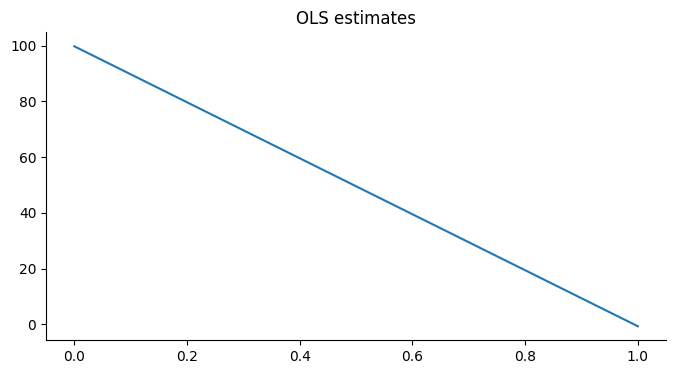

In [43]:
# OLS estimates

res['OLS estimates'].plot(kind='line', figsize=(8, 4), title='OLS estimates')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
# Using the Tariff value for May 2025 (Tariff_May) to predict the Import_Price_Index for May 2025
# Ensure Tariff_May is a 2D array before adding the constant
future_tariff_with_constant = np.array([1, Tariff_May[0]]).reshape(1, -1)

y_pred_may = model.predict(future_tariff_with_constant)

print(f"Predicted Import_Price_Index for May 2025: {y_pred_may[0]:.4f}")

Predicted Import_Price_Index for May 2025: 99.7017


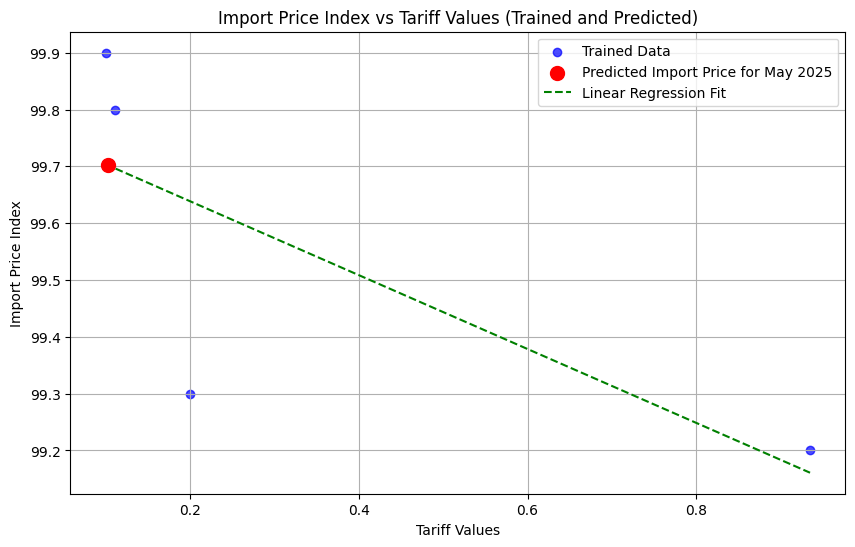

In [29]:
plt.figure(figsize=(10, 6))

# Plot the trained data points (Actual Import Price Index vs Tariff)
plt.scatter(X[:, 1], y, color='blue', label='Trained Data', alpha=0.7)

# Plot the predicted data point (Predicted Import Price Index vs Tariff_May)
plt.scatter(Tariff_May, y_pred_may, color='red', label='Predicted Import Price for May 2025', s=100, zorder=5) # Use a larger size for the predicted point

# Plot the linear regression line based on the trained data
plt.plot(X[:, 1], y_pred, color='green', linestyle='--', label='Linear Regression Fit')

plt.xlabel('Tariff Values')
plt.ylabel('Import Price Index')
plt.title('Import Price Index vs Tariff Values (Trained and Predicted)')
plt.legend()
plt.grid(True)
plt.show()

The above graph shows the predicted Import Price Index of Chinese goods in USA in May 2025.
